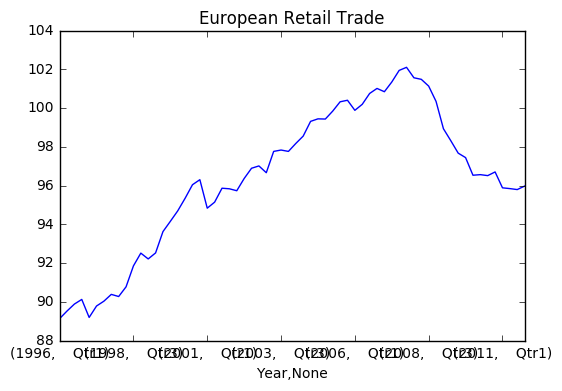

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

df = pd.read_csv('../../assets/data/euretail.csv')
df = df.set_index(['Year'])
df.stack().plot(title='European Retail Trade')

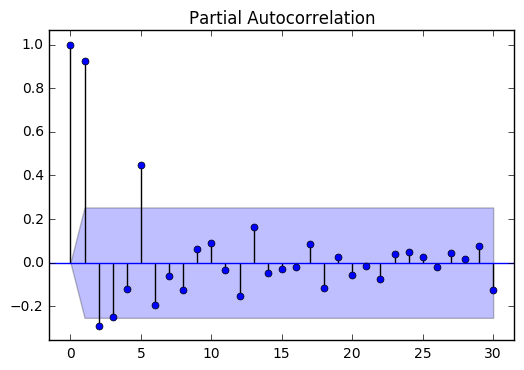

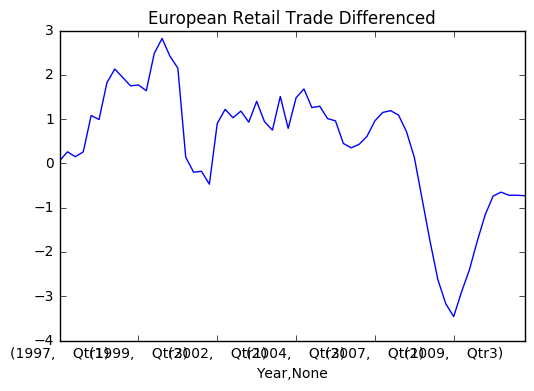

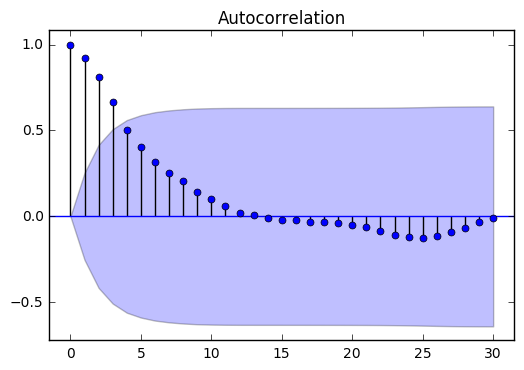

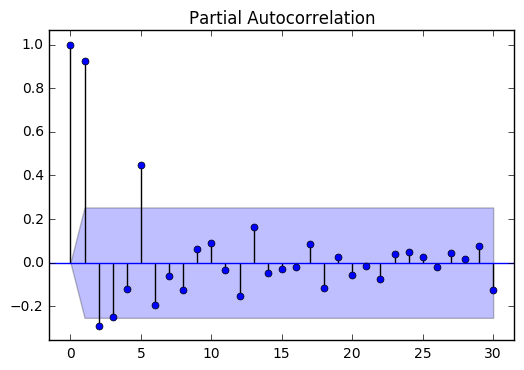

In [2]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

diff0 = df.stack().diff(periods=4)[4:]
diff0.plot(title='European Retail Trade Differenced')
plot_acf(diff0, lags=30)
plot_pacf(diff0, lags=30)

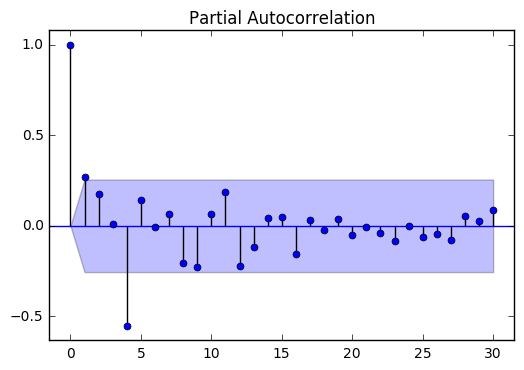

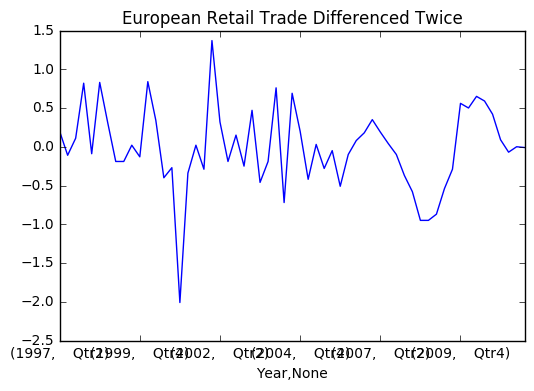

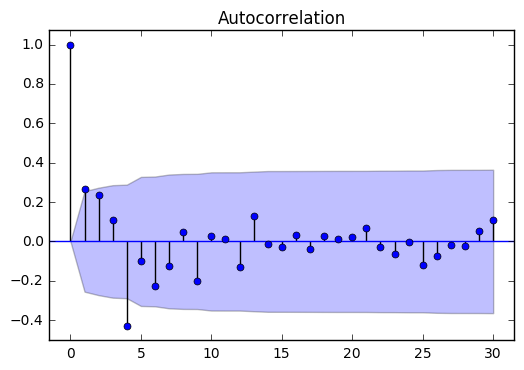

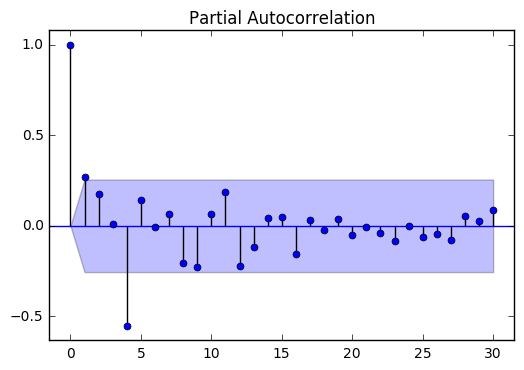

In [3]:
diff1 = diff0.diff()[1:]
diff1.plot(title='European Retail Trade Differenced Twice')
plot_acf(diff1, lags=30)
plot_pacf(diff1, lags=30)

In [5]:
import statsmodels.api as sm
data = df.stack().values
model = sm.tsa.statespace.SARIMAX(data, order=(0,1,1), seasonal_order=(0,1,1,4))
results = model.fit()
results.summary()


AttributeError: 'module' object has no attribute 'statespace'

In [ ]:
# Don't plot the first 5 values, to account for data loss when differencing (d=1 + D=5)
residuals = results.resid[5:]
plt.plot(residuals)

plot_acf(residuals, lags=30)
plot_pacf(residuals, lags=30)

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

lags = min(10, len(residuals)/5)

acorr_ljungbox(residuals, lags=lags)


In [ ]:
model = sm.tsa.statespace.SARIMAX(data, order=(0,1,3), seasonal_order=(0,1,1,4), trend='c')
res = model.fit()

preds = res.forecast(12)
fcast = np.concatenate((data, preds), axis=0)

plt.figure();
plt.plot(data, 'o' , fcast, 'r--');